Curso de Big Data
==============================

Trabajo práctico 3
------------------------------

### Grupo: Armas Braithwaite, Fernández, Menta, Vargas Ochuza

#### Parte 1: Análisis de la base de hogares y cálculo de pobreza
##### Ahora que ya se han familiarizado con la Encuesta Permanente de Hogares (EPH) y con la tabla de adulto equivalente, vamos a complejizar un poco la construcción del índice de pobreza. Lo calcularemos a nivel de hogares, con sus respectivos factores de expansioón y realizaremos una limpieza de la base con mayor dedicación. A continuación, complementamos el trabajo hecho en el TP2 usando la encuesta a nivel hogares de la EPH.

##### Inciso 1
##### Exploren el diseño de registro de la base de hogar: a priori, ¿qué variables creen que pueden ser muy predictivas de pobreza y que sería muy útil incluir para perfeccionar el ejercicio del TP2?

###### Las variables relevantes para explicar la pobreza creemos que son las siguientes:
###### - ITF_hogar (Monto de ingreso total familiar)}: Evalúa la disponibilidad de recursos económicos en el hogar, lo que está estrechamente relacionado con la pobreza.
###### - Región (REGION): La ubicación geográfica de un hogar puede tener un impacto significativo en su nivel de vida y acceso a recursos. Por lo tanto, la región en la que se encuentra el hogar es una variable importante.
###### - Características de la vivienda (IV2, IV3, IV6, IV8, IV10, IV12_1, IV_12_2, IV12_3): Estas variables describen aspectos de la vivienda, como el número de habitaciones, el estado del piso, el acceso a agua, la presencia de baño, la proximidad a basurales, zonas inundables y villas de emergencia. Estas características pueden estar relacionadas con la calidad de vida y el nivel de pobreza.
###### Características habitacionales del hogar (II1, II7, II8, II9): Estas variables describen el número de habitaciones en el hogar, el régimen de tenencia de la vivienda y el tipo de combustible utilizado para cocinar.
###### Estrategias del hogar (V1, V2, V4, V5, V6, V12, V14, V17): Estas variables exploran cómo las personas del hogar obtienen ingresos y si han tenido que recurrir a estrategias como pedir préstamos, vender pertenencias o recibir ayuda social. Estas estrategias pueden indicar la vulnerabilidad económica del hogar.
###### Resumen del hogar (IX_TOT): La cantidad de miembros en el hogar es un factor importante para evaluar la pobreza, ya que un hogar con más miembros puede requerir más recursos para satisfacer sus necesidades básicas.
###### IPCF_hogar (Monto de ingreso per cápita familiar): Proporciona información sobre los recursos disponibles por persona en el hogar, lo que está relacionado con la pobreza.

##### Inciso 2
##### Descarguen la base de microdatos de la EPH correspondiente al primer trimestre de 2023 (la base de hogares se llama usu hogar T123.xls). Importen los datos de la encuesta de hogar y, al igual que en el TP2, conserven sólo las observaciones que corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o del Gran Buenos Aires

In [1]:
# Importamos el módulo necesario para trabajar con la base de datos y otros propositos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Seteamos el directorio donde vamos a trabajar
import os

#os.chdir("C:/Users/bauti/OneDrive/Documentos/Escritorio/Big Data/TP2/EPH_usu_1er_Trim_2023_xlsx")
#os.chdir("C:/Users/Paula/Documents/BIGDATA/TPs_BigData/TP3")

In [3]:
# Cargamos las bases
microdata_hogar = pd.read_excel("usu_hogar_T123.xlsx")

In [4]:
microdata_indv = pd.read_excel("usu_individual_T123.xlsx")

In [5]:
# Del diccionario de variables sabemos que tenemos que quedarnos solamente con los valores 32 y 33
# que son los correspondientes a Ciudad Autónoma de Buenos Aires o Gran Buenos Aires.

# Filtramos el dataframe y lo renombramos
microdata_indv_filtered = microdata_indv[(microdata_indv['AGLOMERADO'] == 32) | (microdata_indv['AGLOMERADO'] == 33)]
len(microdata_indv_filtered)

7619

In [6]:
# Filtramos el dataframe y lo renombramos
microdata_hogar_filtered = microdata_hogar[(microdata_hogar['AGLOMERADO'] == 32) | (microdata_hogar['AGLOMERADO'] == 33)]
len(microdata_hogar_filtered)


2736

##### Inciso 3: Unan la tabla de la encuesta individual con la de la encuesta de hogar.

In [7]:
# Realizamos un inner join de las bases para quedarnos solo con las filas cuyo identificador de hogar se encuentre en ambas bases
# Importante remarcar que hacemos el merge por vivienda y hogar! ya que pueden haber 2 viviendas en un mismo hogar.

merged_microdata = microdata_indv_filtered.merge(microdata_hogar_filtered, on=['CODUSU', "NRO_HOGAR"], how='inner')

# Renombrar las columnas con sufijo "_x" a "_indv"
merged_microdata.rename(columns=lambda x: x.replace("_x", "_indv"), inplace=True)

# Renombrar las columnas con sufijo "_y" a "_hogar"
merged_microdata.rename(columns=lambda x: x.replace("_y", "_hogar"), inplace=True)

# Esto ultimo no es particularmente necesario pues muchos de los valores son duplicados.

In [8]:
# Chequeamos la dimension
len(merged_microdata)

7619

##### Inciso 4: Generen sus propias funciones para limpiar la base de datos o, si deciden utilizar funciones existentes en paquetes como numpy y pandas, mencionen cuáles usarán y de qué paquetes son.
##### &
##### Inciso 5: Limpien la base de datos tomando criterios que hagan sentido, tanto para el tratamiento de valores faltantes, de outliers, como así también decidan qué variables categóricas y strings usarían y transfórmenlas de forma que haga sentido para los ejercicios siguientes. Justifiquen sus decisiones.

In [9]:
# Identificar variables con NaN y contar cuántos NaN
# Utilizamos funciones de Pandas para identificar y limpiar NaN.

variables_con_nan = merged_microdata.columns[merged_microdata.isna().any()].tolist()
conteo_de_nans = merged_microdata[variables_con_nan].isna().sum()

# Imprimir las variables con NaN y la cantidad de NaN en cada una
for variable in variables_con_nan:
    print(f'Variable: {variable}, Cantidad de NaN: {conteo_de_nans[variable]}')

Variable: CH08, Cantidad de NaN: 1
Variable: CH14, Cantidad de NaN: 3959
Variable: CH15_COD, Cantidad de NaN: 6248
Variable: CH16_COD, Cantidad de NaN: 7515
Variable: IMPUTA, Cantidad de NaN: 7548
Variable: PP03C, Cantidad de NaN: 4096
Variable: PP03D, Cantidad de NaN: 4096
Variable: PP3E_TOT, Cantidad de NaN: 4096
Variable: PP3F_TOT, Cantidad de NaN: 4096
Variable: PP03G, Cantidad de NaN: 4096
Variable: PP03H, Cantidad de NaN: 4096
Variable: PP03I, Cantidad de NaN: 4096
Variable: PP03J, Cantidad de NaN: 4096
Variable: INTENSI, Cantidad de NaN: 4096
Variable: PP04A, Cantidad de NaN: 4096
Variable: PP04B_COD, Cantidad de NaN: 4096
Variable: PP04B1, Cantidad de NaN: 4096
Variable: PP04B2, Cantidad de NaN: 4096
Variable: PP04B3_MES, Cantidad de NaN: 4096
Variable: PP04B3_ANO, Cantidad de NaN: 4096
Variable: PP04B3_DIA, Cantidad de NaN: 4096
Variable: PP04C, Cantidad de NaN: 4096
Variable: PP04C99, Cantidad de NaN: 4096
Variable: PP04D_COD, Cantidad de NaN: 4096
Variable: PP04G, Cantidad d

In [10]:
# Establecer el umbral de 3500 para determinar qué columnas eliminar
umbral = 3500

# Eliminar columnas con más de 3500 valores NaN
# Utilizamos la funcion de Pandas dropna

merged_microdata = merged_microdata.dropna(thresh=umbral, axis=1)
merged_microdata.head(2)

,CODUSU,ANO4_indv,TRIMESTRE_indv,NRO_HOGAR,COMPONENTE,H15,REGION_indv,MAS_500_indv,AGLOMERADO_indv,PONDERA_indv,...,RDECCFR_hogar,GDECCFR_hogar,ADECCFR_hogar,PONDIH_hogar,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,5,5.0,6,2540,1,0,2,0,0,0
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,5,5.0,6,2540,1,0,2,0,0,0


In [11]:
# Definimos las variables que deseamos filtrar
variables = ['ITF_hogar', 'ITF_indv', 'IPCF_hogar', 'IPCF_indv', 'P21', 'P47T']

# Definir el umbral del percentil (en este caso, 97%)
percentile_threshold = 0.97

# Iterar sobre las variables y aplicar el filtrado utlizando Pandas.
for variable in variables:
    # Calcular el percentil umbral
    percentile_value = merged_microdata[variable].quantile(percentile_threshold)
    
    # Filtrar el DataFrame para mantener solo los valores por debajo del percentil
    merged_microdata = merged_microdata[merged_microdata[variable] <= percentile_value]

len(merged_microdata)

6363

In [12]:
# Limpiamos algunas variables con valores especificos utlizando Pandas

merged_microdata = merged_microdata[merged_microdata['CH08'] != 9]
merged_microdata = merged_microdata[merged_microdata['IV2'] != 99]
merged_microdata = merged_microdata[merged_microdata['II1'] != 99]
merged_microdata = merged_microdata[merged_microdata['II9'] > 0]
merged_microdata = merged_microdata[merged_microdata['ITF_hogar'] >= 0]
merged_microdata = merged_microdata[merged_microdata['ITF_indv'] >= 0]
merged_microdata = merged_microdata[merged_microdata['IPCF_hogar'] >= 0]
merged_microdata = merged_microdata[merged_microdata['IPCF_indv'] >= 0]


len(merged_microdata)

6335

##### Inciso 6: Presenten estadísticas descriptivas de cinco variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir pobreza.

**IV8** Tiene baño

**IV3** Piso interior de la casa

**V4** La cubierta exterior del techo es de...

**IV11** El desague del baño es...

**IPCF_hogar** Monto de ingreso per cápita familiar del hogar

##### Separamos el analisis entre categoricas y no categoricas.

In [13]:
merged_microdata['IPCF_hogar'].describe().T

count      6335.000000
mean      25048.015656
std       32095.284287
min           0.000000
25%           0.000000
50%           0.000000
75%       45480.000000
max      125000.000000
Name: IPCF_hogar, dtype: float64

C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


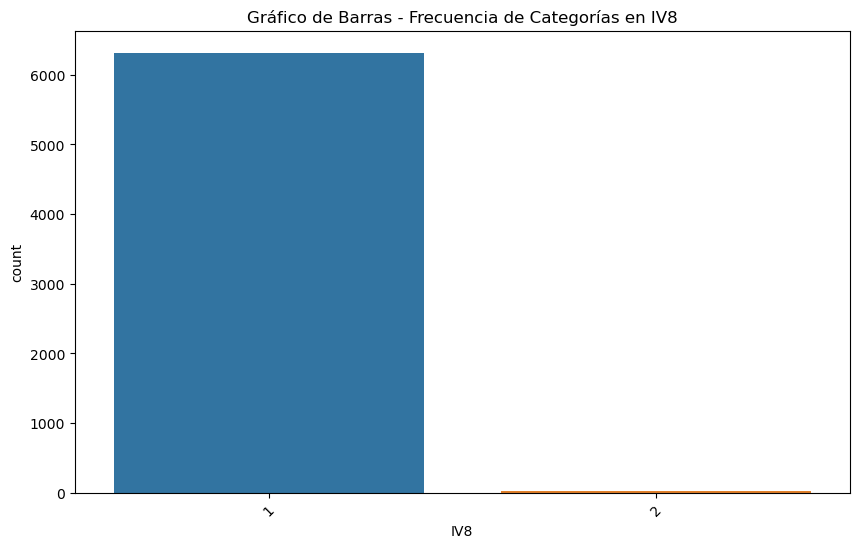

Porcentaje de cada categoría en IV8:
IV8
1    99.73165
2     0.26835
Name: proportion, dtype: float64



C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


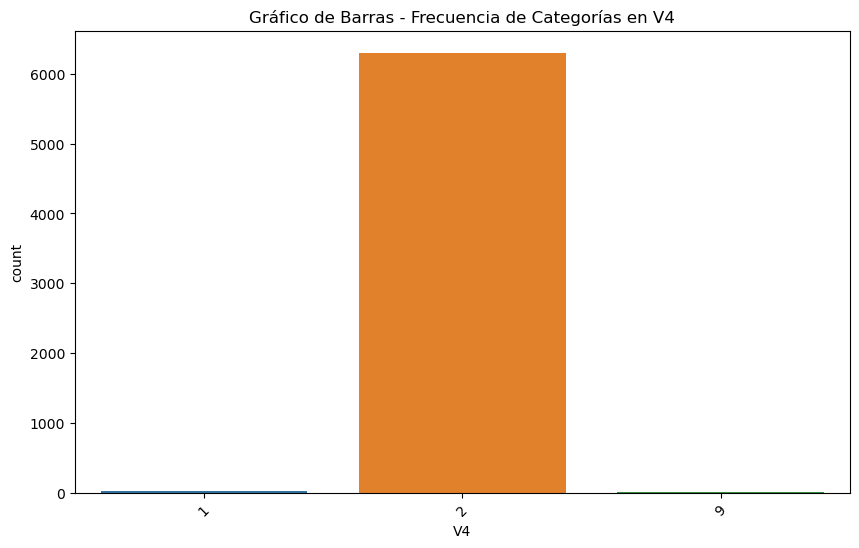

Porcentaje de cada categoría en V4:
V4
2    99.526440
1     0.347277
9     0.126283
Name: proportion, dtype: float64



C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


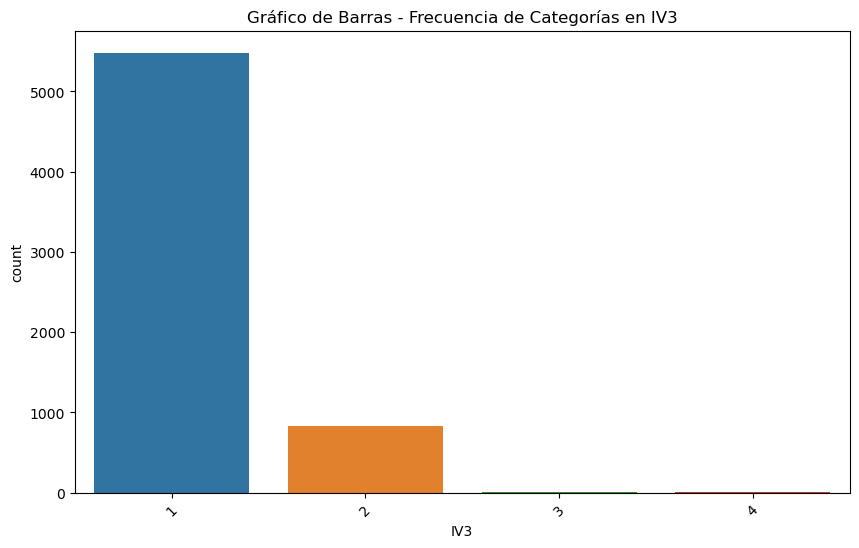

Porcentaje de cada categoría en IV3:
IV3
1    86.566693
2    13.149171
3     0.205209
4     0.078927
Name: proportion, dtype: float64



C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


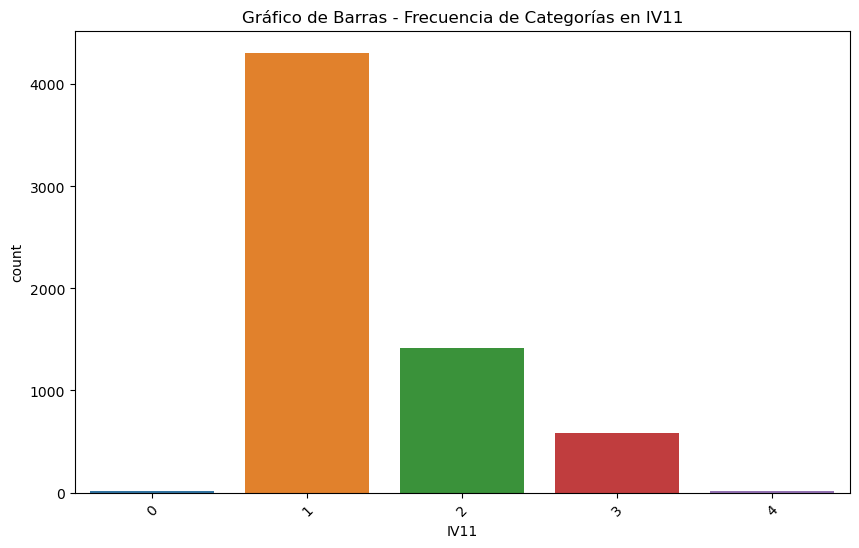

Porcentaje de cada categoría en IV11:
IV11
1    68.034728
2    22.304657
3     9.171271
0     0.268350
4     0.220994
Name: proportion, dtype: float64



In [14]:
variables = ['IV8', 'V4', 'IV3', 'IV11']

for var in variables:
    # Conteo de frecuencias
    conteo_frecuencias = merged_microdata[var].value_counts()

    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_microdata, x=var)
    plt.title(f'Gráfico de Barras - Frecuencia de Categorías en {var}')
    plt.xticks(rotation=45)
    plt.show()

    # Porcentaje de cada categoría
    porcentaje = merged_microdata[var].value_counts(normalize=True) * 100
    print(f"Porcentaje de cada categoría en {var}:")
    print(porcentaje)
    print()

In [15]:
# Armamos una función para no tener que lidiar con el tedioso uso del archivo de Excel.

# Esta función, asignar_valor, toma dos argumentos, edad y genero, y asigna un valor numérico basado en reglas condicionales
# que dependen de estos dos argumentos. Las condiciones se prueban en orden y, cuando se encuentra una coincidencia, se
# devuelve un valor específico. Si no se cumple ninguna condición, la función devuelve None.
#Las condiciones están diseñadas para categorizar a las personas en grupos según su edad y género y asignarles un valor numérico basado en esas categorías.

def asignar_valor(edad, genero):
    if edad < 1:
        if genero == 2:
            return 0.35
        elif genero == 1:
            return 0.35
    elif edad == 1:
        if genero == 2:
            return 0.37
        elif genero == 1:
            return 0.37
    elif edad == 2:
        if genero == 2:
            return 0.46
        elif genero == 1:
            return 0.46
    elif edad == 3:
        if genero == 2:
            return 0.51
        elif genero == 1:
            return 0.51
    elif edad == 4:
        if genero == 2:
            return 0.55
        elif genero == 1:
            return 0.55
    elif edad == 5:
        if genero == 2:
            return 0.60
        elif genero == 1:
            return 0.60
    elif edad == 6:
        if genero == 2:
            return 0.64
        elif genero == 1:
            return 0.64
    elif edad == 7:
        if genero == 2:
            return 0.66
        elif genero == 1:
            return 0.66
    elif edad == 8:
        if genero == 2:
            return 0.68
        elif genero == 1:
            return 0.68
    elif edad == 9:
        if genero == 2:
            return 0.69
        elif genero == 1:
            return 0.69
    elif edad == 10:
        if genero == 2:
            return 0.70
        elif genero == 1:
            return 0.79
    elif edad == 11:
        if genero == 2:
            return 0.72
        elif genero == 1:
            return 0.82
    elif edad == 12:
        if genero == 2:
            return 0.74
        elif genero == 1:
            return 0.85
    elif edad == 13:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 0.90
    elif edad == 14:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 0.96
    elif edad == 15:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.00
    elif edad == 16:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.03
    elif edad == 17:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.04
    elif 18 <= edad <= 29:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 1.02
    elif 30 <= edad <= 45:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.00
    elif 46 <= edad <= 60:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 1.00
    elif 61 <= edad <= 75:
        if genero == 2:
            return 0.67
        elif genero == 1:
            return 0.83
    elif edad > 75:
        if genero == 2:
            return 0.63
        elif genero == 1:
            return 0.74
    else:
        return None  # En caso de que no haya una combinación válida

##### Inciso 7: Repitan el inciso 1.2.f del TP2 para construir la columna adulto equiv y la columna ad equiv hogar (pueden utilizar su código del TP2).

In [16]:
# Aplicamos la funcion al data frame. Creamos una nueva columna llamada 'adulto_equiv' en el DataFrame 'microdata_filtered', donde se calculan y asignan valores equivalentes para adultos
# a partir de las edades ('CH06') y géneros ('CH04') de cada fila utilizando una función llamada 'asignar_valor'.

merged_microdata['adulto_equiv'] = merged_microdata.apply(lambda row: asignar_valor(row['CH06'], row['CH04']), axis=1)

In [17]:
# Limpiamos y Renombramos

merged_microdata = merged_microdata.dropna(subset=['adulto_equiv'])

result = merged_microdata.groupby(by=['CODUSU','NRO_HOGAR']).agg({'adulto_equiv': 'sum'}).reset_index()
result.rename(columns={'adulto_equiv': 'ad_equiv_hogar'}, inplace=True)

merged_microdata_FINAL = pd.merge(merged_microdata, result[['CODUSU','NRO_HOGAR', 'ad_equiv_hogar']],
                     on=['CODUSU','NRO_HOGAR'],
                     how='left')

##### Inciso 8: Repitan el inciso 1.3 y 1.4 del TP2 para dividir la base en dos dataframes donde: uno conserve las personas que no reportaron ITF (dataframe llamado respondieron) y otro conserve a las personas que no reportaron ITF (llamado norespondieron). Además, agreguen a la base respondieron una columna llamada ingreso necesario que sea el producto de la canasta básica por ad equiv hogar.

In [18]:
# Definimos ambas bases según los criterios del enunciado, comprobando la condición sobre ITF.
# Imprimimos la longitud del DataFrame para obtener las cantidades.

# Reemplazar NaN por ceros en ITF_indv e ITF_hogar
merged_microdata['ITF_indv'].fillna(0, inplace=True)
merged_microdata['ITF_hogar'].fillna(0, inplace=True)

respondieron = merged_microdata_FINAL[(merged_microdata_FINAL['ITF_indv'] != 0) | (merged_microdata_FINAL['ITF_hogar'] != 0)]
print(len(respondieron))

norespondieron = merged_microdata_FINAL[(merged_microdata_FINAL['ITF_indv'] == 0) & (merged_microdata_FINAL['ITF_hogar'] == 0)]
print(len(norespondieron))

3132
3203


In [19]:
# Definimos el valor de la canasta básica y luego
# seguimos las instrucciones del enunciado para añadir una columna que indique el ingreso necesario

valor_canasta_basica = 57371.05

respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * valor_canasta_basica

C:\Users\mateo\AppData\Local\Temp\ipykernel_19260\2316923591.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * valor_canasta_basica


##### Inciso 9: Agreguen a la base respondieron una columna llamada pobre, que tome valor 1 si el ITF es menor al ingreso necesario que necesita esa familia y 0 en caso contrario.

In [20]:
# Creamos una nueva columna llamada 'pobre' en el DataFrame 'respondieron',
# donde se asigna un valor de 1 si el valor en la columna 'ITF' es menor que
# el valor en la columna 'ingreso_necesario', y 0 en caso contrario, convirtiendo los resultados a enteros.

respondieron['pobre'] = ((respondieron['ITF_hogar'] < respondieron['ingreso_necesario']) & (respondieron['ITF_indv'] < respondieron['ingreso_necesario'])).astype(int)

# Sumamos todos los 1

num_pobres = respondieron['pobre'].sum()

print(f'Número de pobres identificados: {num_pobres}')

# En %

print(num_pobres/len(respondieron))



Número de pobres identificados: 1487
0.47477650063856963


C:\Users\mateo\AppData\Local\Temp\ipykernel_19260\4235357720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = ((respondieron['ITF_hogar'] < respondieron['ingreso_necesario']) & (respondieron['ITF_indv'] < respondieron['ingreso_necesario'])).astype(int)


##### Inciso 10: En el TP2 calcularon los individuos bajo la línea de pobreza. Sin embargo, cuando se habla de pobreza el número más utilizado es el de la tasa de hogares bajo la línea de pobreza. Para calcularlo, utilicen una sola observación por hogar y sumen el ponderador PONDIH que permite expandir la muestra de la EPH al total de la población que representa. ¿Cuál es la tasa de hogares bajo la línea de pobreza para el GBA? ¿Se asemeja al que reporta el INDEC en sus informes?

In [21]:
merged_microdata_FINAL['PONDIH_hogar']

0        2540
1        2540
2       14082
3       14082
4       14082
        ...  
6330     4220
6331     4220
6332        0
6333        0
6334        0
Name: PONDIH_hogar, Length: 6335, dtype: int64

In [22]:
# Agrupar por hogar y utilizar el ponderador PONDIH para calcular la tasa de hogares pobres
# Agrupamos los datos por el código del hogar (CODUSU)
microdata_repres = respondieron.groupby('CODUSU').first().reset_index()


In [23]:
# Ponderacion
microdata_repres['ponderacion'] = microdata_repres['PONDIH_indv'] * microdata_repres['pobre']

In [24]:
pobres = microdata_repres['ponderacion'].sum()
poblacion = microdata_repres['PONDIH_indv'].sum()
porcentaje_pobres = (pobres / poblacion) * 100

In [25]:
pobres1 = '{:,}'.format(pobres).replace(',', '.')
print(f"pobres: {pobres1}")
print(f"tasa {porcentaje_pobres:.2f}%")

pobres: 1.439.914
tasa 36.67%


#### La tasa de pobreza nos dio 6 PP mayor que la reportada por el INDEC. Creemos que esto puede ser debido a distintos criterios de limpieza de la base. Aun asi, la diferencia no es tan significativa.

# Parte 2: Construcción de funciones

In [26]:
import pandas as pd
import numpy as np
#from ISLP import load_data

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

## Inciso 1

#### Escriban una funcion, llamada evalua metodo, que reciba como argumentos un modelo y los datos de entrenamiento y prueba (X train, y train, X test,y test).
#### La función debe ajustar el modelo con los datos de entrenamiento y calcular las métricas que considere necesarias para esta problem´atica (de mínima, deben reportar la matriz de confusión, las curvas ROC y los valores d eAUC y de accuracy score de cada método). 
#### El output de la función debe seruna colección con las métricas evaluadas.


In [27]:
# Cargamos una base de internet para probar la función. 
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

In [28]:
# Quitamos todas las variables que sean string y todas las filas con NAs
titanic_df = titanic_df.drop(titanic_df.select_dtypes(include=['object']).columns, axis=1)
titanic_df=titanic_df.dropna()

In [29]:
# Formamos un df de variables explicativas y otro con la variable dependiente.
X=titanic_df.drop(columns=['Survived'])
y=titanic_df.Survived

In [30]:
# Le agregamos una columna de 1s al dataframe X para que sirva como el intercepto.
X = sm.add_constant(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

## PROBLEMA AÚN: parametros h_l, h_k

In [32]:
def evalua_metodo(modelo, X_train, y_train, X_test, y_test, h_l=0.0001, h_k=5):
    
    '''
    Evalua un modelo de clasificación proporcionando métricas clave y visualizando la curva ROC.
    
    Input:
    - modelo: modelo de clasificación ya instanciado (debe tener los métodos `fit`, `predict` y `predict_proba`).
    - X_train, y_train: datos de entrenamiento.
    - X_test, y_test: datos de prueba.
    
    Output:
    - Diccionario con las siguientes métricas:
        * matriz_confusion: Matriz de confusión del modelo.
        * valor_auc: Área bajo la curva ROC.
        * accuracy: Precisión del modelo.
        *ECM (MSE en inglés): error cuadrático medio
    - Gráfico de la curva ROC.
    '''
    # Entrenando el modelo
    if modelo==KNeighborsClassifier:
        y = modelo(h_k).fit(X_train, y_train)
    elif modelo== LogisticRegression:
        y = modelo(C=1/h_l).fit(X_train, y_train)
    elif modelo== LinearDiscriminantAnalysis:
        y = modelo().fit(X_train, y_train)
    else:
        y = modelo.fit(X_train, y_train)    
    # Predicciones
    y_pred = modelo.predict(X_test)
    y_pred_prob = modelo.predict_proba(X_test)[:, 1]
    
    # Calculando métricas
    matriz_confusion = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    valor_auc = auc(fpr, tpr)
    accuracy = accuracy_score(y_test, y_pred)
    ecm = mean_squared_error(y_test, y_pred) # Deseamos tener esta métrica disponible para la siguiente función. 
    # Dibujando la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (área = %0.2f)' % valor_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()
    
    # Retornando métricas
    return {
        'matriz_confusion': matriz_confusion,
        'valor_auc': valor_auc,
        'accuracy': accuracy,
        'ecm': ecm,
    }


In [33]:
# Vamos a probar la función con diferentes modelos e hiperparámetros.

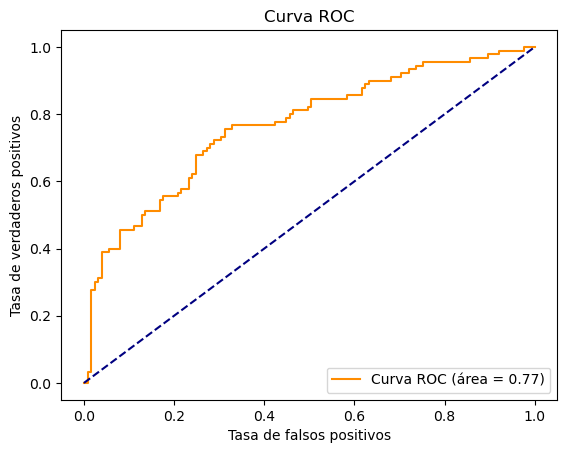

{'matriz_confusion': array([[109,  16],
       [ 45,  45]], dtype=int64), 'valor_auc': 0.7658666666666667, 'accuracy': 0.7162790697674418, 'ecm': 0.2837209302325581}


In [34]:

modelo = LogisticRegression(max_iter=10000)
# Usar la función evalua_metodo
resultados = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
print(resultados)

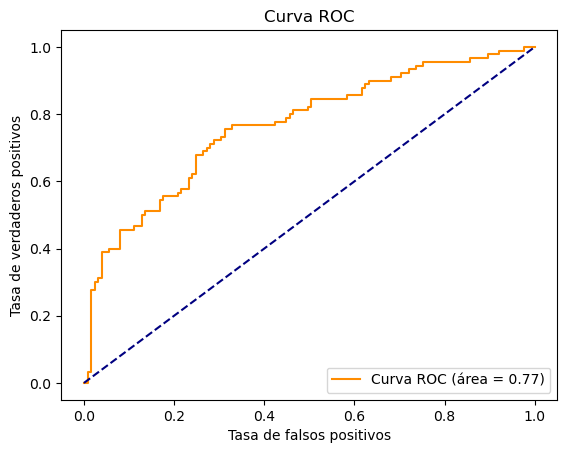

{'matriz_confusion': array([[109,  16],
       [ 45,  45]], dtype=int64), 'valor_auc': 0.7658666666666667, 'accuracy': 0.7162790697674418, 'ecm': 0.2837209302325581}


In [35]:
# Definir el modelo
modelo = LogisticRegression(max_iter=10000)
# Usar la función evalua_metodo
resultados = evalua_metodo(modelo, X_train, y_train, X_test, y_test,h_l=10)
print(resultados)

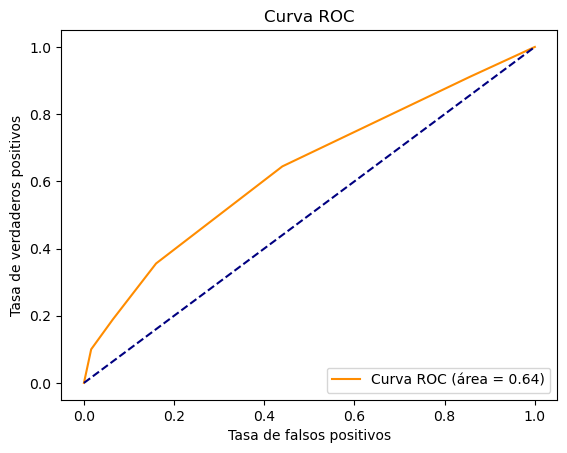

{'matriz_confusion': array([[105,  20],
       [ 58,  32]], dtype=int64), 'valor_auc': 0.6350222222222222, 'accuracy': 0.6372093023255814, 'ecm': 0.3627906976744186}


In [36]:
# Definir el modelo
knn = KNeighborsClassifier(n_neighbors=5)
modelo2=knn.fit(X_train, y_train)
#Usar la función evalua_metodo
resultados = evalua_metodo(modelo2, X_train, y_train, X_test, y_test)
print(resultados)

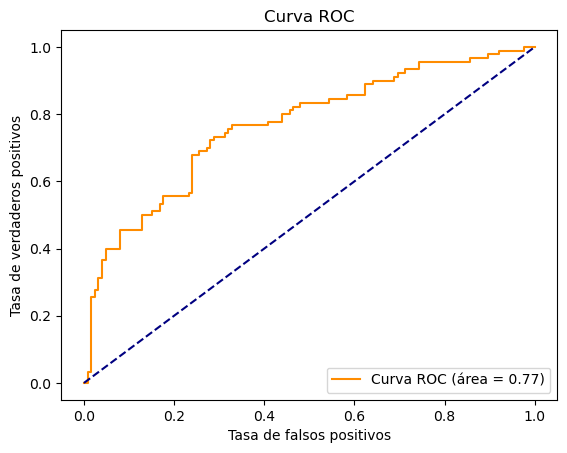

{'matriz_confusion': array([[109,  16],
       [ 45,  45]], dtype=int64), 'valor_auc': 0.7654222222222222, 'accuracy': 0.7162790697674418, 'ecm': 0.2837209302325581}


In [37]:
# Definir el modelo
modelo3= LinearDiscriminantAnalysis(n_components=1)
#Usar la función evalua_metodo
resultados = evalua_metodo(modelo3, X_train, y_train, X_test, y_test)
print(resultados)

## Inciso 2

#### Escriban una función, llamada cross validation, que realice validación cruzada con k iteraciones (k-fold CV), llamando a la función del  inciso anterior en cada una, pero para las k distintas particiones. 
#### La función debe recibir como argumentos el modelo, el valor de k y un dataset (es decir, s´olo X e y).
#### Pueden ayudarse con la función KFold para generar las particiones necesarias

In [38]:
from sklearn.preprocessing import StandardScaler

In [43]:
def cross_validation(modelo, k, x, y, std=True):
    '''
    Realiza validación cruzada de un modelo de clasificación y provee la distribución de varias métricas de precisión.
    Input:
    - modelo: modelo de clasificación ya instanciado (debe tener los métodos `fit`, `predict` y `predict_proba`).
    - k: número de particiones
    - x: variables explicativas. Ya debe contener una columnas con 1s y debe estar en formato dataframe o numpyarray.
    - y: variable categórica a predecir. Debe estar en formato dataframe o numpyarray.
    Output:
    - Dataframe con las siguientes métricas:
        * matriz_confusion: Matriz de confusión del modelo.
        * valor_auc: Área bajo la curva ROC.
        * accuracy: Precisión del modelo.
        *ECM (MSE en inglés): error cuadrático medio
    '''
    # Convertimos la data en pandas dataframe en caso no lo haya estado originalmente.
    if isinstance(x, np.ndarray):
        x = pd.DataFrame(x)
    if isinstance(y, np.ndarray):
        y = pd.DataFrame(y)
    
    sc = StandardScaler()
    kf = KFold(n_splits=k, shuffle=True)
    output = []
    for i, (train_index, test_index) in enumerate(kf.split(x)):
        x_train, x_test = x.iloc[list(train_index)], x.iloc[list(test_index)]
        y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
        
        if std == True:
            # Estandarizamos las variables explicativas de las muestras de entrenamiento y de prueba
            x_train = pd.DataFrame(sc.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
            x_test = pd.DataFrame(sc.transform(x_test), index=x_test.index, columns=x_test.columns)
        
        modelo.fit(x_train, y_train)
        # Predicciones
        y_pred = modelo.predict(x_test)
        y_pred_prob = modelo.predict_proba(x_test)[:, 1]
        
        # Calculando métricas
        matriz_confusion = confusion_matrix(y_test, y_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        valor_auc = auc(fpr, tpr)
        accuracy = accuracy_score(y_test, y_pred)
        ecm = mean_squared_error(y_test, y_pred)
        
        output.append((i+1, ecm, valor_auc, accuracy))
        
    output_df = pd.DataFrame(output, columns=["Particion", "MSE", "valor_auc", "accuracy"])
    return output_df


In [44]:
# Ejemplo de la función con 5 particiones y sin estandarización. 
cross_validation(modelo,5,X,y,std=False)

,Particion,MSE,valor_auc,accuracy
0,1,0.258741,0.789876,0.741259
1,2,0.314685,0.769976,0.685315
2,3,0.321678,0.712235,0.678322
3,4,0.279720,0.743026,0.720280
4,5,0.288732,0.750849,0.711268


## Inciso 3

#### Escriban una función, llamada evalua config que reciba una lista de configuraciones de hiperparámetros (los distintos valores a probar como hiper-parámetros podrian codificarse en diccionarios de Python)y utilizando la función cross validation obtenga el error cuadrado promedio para cada configuración.

In [45]:
def evalua_config(configuraciones, X, y,k):
    """
    Evalúa diferentes configuraciones de hiperparámetros para un modelo  de regresión logística y devuelve la mejor configuración
    bajo el criterio del mínimo error cuadrático medio. 
    Input:
    - configuraciones (list): Lista de diccionarios con las diferentes configuraciones de hiperparámetros.
    - X: variables independientes del conjunto de datos.
    - y: variable dependiente (target) del conjunto de datos.
    - k: número de particiones que se utiliza
    - Funciones auxiliares:
    - cross_validation
    - evalua_metodo (definida dentro de cross_validation)
    Output:
    - Diccionario con la mejor configuración y su correspondiente precisión promedio.
    """
    
    mejor_configuracion = None
    menor_ecm = 10000 
    
    for config in configuraciones:
        modelo = LogisticRegression(max_iter=500, **config)
        resultados = cross_validation(modelo, k, X, y)
        ecm_promedio = resultados['MSE'].mean()  
        if ecm_promedio < menor_ecm:
            menor_ecm=ecm_promedio
            mejor_configuracion=config 
        #if accuracy_promedio > mejor_accuracy:
            #mejor_accuracy = accuracy_promedio
            #mejor_configuracion = config
    
    return {
        'mejor_configuracion': mejor_configuracion,
        #'mejor_accuracy': mejor_accuracy
        'menor_ecm': menor_ecm 
    }



In [46]:
configuraciones = [
    {'penalty': 'l2', 'C': 1.0},
    {'penalty': 'l1', 'C': 1.0, 'solver': 'saga'},
    {'penalty': 'l2', 'C': 0.5},
    ]

resultado = evalua_config(configuraciones, X, y,10)
print(resultado)


{'mejor_configuracion': {'penalty': 'l2', 'C': 0.5}, 'menor_ecm': 0.29550078247261347}


## Ejercicio 4

## Inciso 4

#### Escriban una función llamada "evalua multiples metodos" que les permita implementar los siguiente métodos con los hiperparámetros que ustedes elijan. 
#### Para la regresión logística, aseg´urense de que esta función utilice su función.
#### evalua config para optimizar el λ de la regularizaci´on. Finalmente, el output de la función debe ser una tabla donde las columnas sean las métricas que hayan evaluado (las que hayan incluido en la función evalua metodo) y las filas sean los modelos (con su configuraci´on de hiperpar´ametros asociada) que hayan corrido.
#### Asegúrense de que la tabla incluya una columna con nombre del modelo y el valor de los hiperparámetros/configuración:

In [47]:
def evalua_multiples_metodos(X, y, configuraciones_rl, k, h_n=5):
    """
    Evalúa diferentes métodos, entre ellos, Regresión Logistica bajo la manera óptima de regularizacion (Lasso o Ridge, y el lambda óptimo).
    
    Parámetros:
    - X: variables independientes del conjunto de datos.
    - y: variable dependiente (target) del conjunto de datos.
    - configuraciones_rl (list): Lista de diccionarios con las diferentes configuraciones de hiperparámetros.
    - k: el número de particiones
    - h_n: número de vecinos. 
    Devoluciones:
    - Dataframe con los indicadores de precisión de cada modelo y, de ser RegLog, su modo óptimo de regularización.
    """
    modelos = {
        "Regresión Logística": LogisticRegression(max_iter=500),
        "LDA": LinearDiscriminantAnalysis(),
        "KNN": KNeighborsClassifier(n_neighbors=h_n)}

    # Optimización de hiperparámetros para Regresión Logística
    mejor_config = evalua_config(configuraciones_rl, X, y, k)['mejor_configuracion']
    modelos["Regresión Logística"].set_params(**mejor_config)

    # Almacenar resultados
    resultados = []

    for nombre, modelo in modelos.items():
        metricas = cross_validation(modelo, k, X, y)
        ecm_promedio = metricas["MSE"].mean()
        accuracy_promedio=metricas["accuracy"].mean()
        if nombre == "Regresión Logística":
            penalty_value = mejor_config['penalty']
            hiper_l = 1 / mejor_config['C']
        else:
            penalty_value = ""
            hiper_l = ""
        resultados.append({
            "Modelo": nombre,
            "ecm_promedio": ecm_promedio,
            "Accuracy": accuracy_promedio,
            "Método de reg.": penalty_value,
            "Lambda": hiper_l
        })

    return pd.DataFrame(resultados)

# Parte 3: Análisis de la base de hogares y cálculo de pobreza

In [48]:
import pandas as pd
import numpy as np
#from ISLP import load_data

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [49]:
variables = respondieron.columns
for variable in variables:
   print(variable)

CODUSU
ANO4_indv
TRIMESTRE_indv
NRO_HOGAR
COMPONENTE
H15
REGION_indv
MAS_500_indv
AGLOMERADO_indv
PONDERA_indv
CH03
CH04
CH05
CH06
CH07
CH08
CH09
CH10
CH11
CH12
CH13
CH14
CH15
CH16
NIVEL_ED
ESTADO
CAT_OCUP
CAT_INAC
PP02C1
PP02C2
PP02C3
PP02C4
PP02C5
PP02C6
PP02C7
PP02C8
PP02E
PP02H
PP02I
PP03C
PP03D
PP3E_TOT
PP3F_TOT
PP03G
PP03H
PP03I
PP03J
INTENSI
PP04A
PP04B_COD
PP04B1
PP04B2
PP04B3_MES
PP04B3_ANO
PP04B3_DIA
PP04C
PP04C99
PP04D_COD
PP04G
PP05B2_MES
PP05B2_ANO
PP05B2_DIA
PP05C_1
PP05C_2
PP05C_3
PP05E
PP05F
PP05H
PP06A
PP06C
PP06D
PP06E
PP06H
PP07A
PP07C
PP07D
PP07E
PP07F1
PP07F2
PP07F3
PP07F4
PP07F5
PP07G1
PP07G2
PP07G3
PP07G4
PP07G_59
PP07H
PP07I
PP07J
PP07K
PP08D1
PP08D4
PP08F1
PP08F2
PP08J1
PP08J2
PP08J3
PP09A
PP09B
PP09C
P21
DECOCUR
RDECOCUR
GDECOCUR
ADECOCUR
PONDIIO
TOT_P12
P47T
DECINDR
RDECINDR
GDECINDR
ADECINDR
PONDII
V2_M
V3_M
V4_M
V5_M
V8_M
V9_M
V10_M
V11_M
V12_M
V18_M
V19_AM
V21_M
T_VI
ITF_indv
DECIFR_indv
RDECIFR_indv
GDECIFR_indv
ADECIFR_indv
IPCF_indv
DECCFR_indv
RDECCFR_

In [50]:
# Eliminar columnas específicas
respondieron = respondieron.drop(columns=['CODUSU','ANO4_indv','TRIMESTRE_indv','REGION_indv', 'MAS_500_indv','ANO4_hogar','TRIMESTRE_hogar','REGION_hogar', 'MAS_500_hogar', 'CH05','CH14'])

# Eliminar un rango de columnas: ingresos de la ocupación principal de los asalariados
respondieron = respondieron.drop(columns=[col for col in respondieron.columns if col.startswith('PP08')])

# Eliminar un rango de columnas: Ingresos de la ocupación principal de los trabajadores independientes
respondieron = respondieron.drop(columns=[col for col in respondieron.columns if col.startswith('PP06')])

# Ingresos de la ocupación principal
start = respondieron.columns.get_loc('PP03C')
end = respondieron.columns.get_loc('PONDIH_indv')

columns_to_drop = respondieron.columns[start:end+1]
respondieron = respondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = respondieron.columns.get_loc('ITF_hogar')
end = respondieron.columns.get_loc('PONDIH_hogar')

columns_to_drop = respondieron.columns[start:end+1]
respondieron = respondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = respondieron.columns.get_loc('adulto_equiv')
end = respondieron.columns.get_loc('ingreso_necesario')

columns_to_drop = respondieron.columns[start:end+1]
respondieron = respondieron.drop(columns=columns_to_drop)

In [51]:
# Eliminar columnas específicas
norespondieron = norespondieron.drop(columns=['CODUSU','ANO4_indv','TRIMESTRE_indv','REGION_indv', 'MAS_500_indv','ANO4_hogar','TRIMESTRE_hogar','REGION_hogar', 'MAS_500_hogar', 'CH05','CH14'])

# Eliminar un rango de columnas: ingresos de la ocupación principal de los asalariados
norespondieron = norespondieron.drop(columns=[col for col in norespondieron.columns if col.startswith('PP08')])

# Eliminar un rango de columnas: Ingresos de la ocupación principal de los trabajadores independientes
norespondieron = norespondieron.drop(columns=[col for col in norespondieron.columns if col.startswith('PP06')])

# Ingresos de la ocupación principal
start = norespondieron.columns.get_loc('P21')
end = norespondieron.columns.get_loc('PONDIH_indv')

columns_to_drop = norespondieron.columns[start:end+1]
norespondieron = norespondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = norespondieron.columns.get_loc('ITF_hogar')
end = norespondieron.columns.get_loc('PONDIH_hogar')

columns_to_drop = norespondieron.columns[start:end+1]
norespondieron = norespondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = norespondieron.columns.get_loc('adulto_equiv')
end = norespondieron.columns.get_loc('ad_equiv_hogar')

columns_to_drop = norespondieron.columns[start:end+1]
norespondieron = norespondieron.drop(columns=columns_to_drop)

In [52]:
variables = respondieron.columns
for variable in variables:
   print(variable)

NRO_HOGAR
COMPONENTE
H15
AGLOMERADO_indv
PONDERA_indv
CH03
CH04
CH06
CH07
CH08
CH09
CH10
CH11
CH12
CH13
CH15
CH16
NIVEL_ED
ESTADO
CAT_OCUP
CAT_INAC
PP02C1
PP02C2
PP02C3
PP02C4
PP02C5
PP02C6
PP02C7
PP02C8
PP02E
PP02H
PP02I
REALIZADA
AGLOMERADO_hogar
PONDERA_hogar
IV1
IV2
IV3
IV4
IV5
IV6
IV7
IV8
IV9
IV10
IV11
IV12_1
IV12_2
IV12_3
II1
II2
II3
II3_1
II4_1
II4_2
II4_3
II5
II5_1
II6
II6_1
II7
II8
II9
V1
V2
V21
V22
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19_A
V19_B
IX_TOT
IX_MEN10
IX_MAYEQ10
VII1_1
VII1_2
VII2_1
VII2_2
VII2_3
VII2_4
pobre


In [53]:
# To check before running the models
# Obtener el nombre de las columnas que tienen al menos un NaN
columnas_con_nas = respondieron.columns[respondieron.isna().any()].tolist()

# Imprimir las columnas
print(columnas_con_nas)


['CH08']


In [54]:
# Eliminar las observaciones con NaN en 'column_name' directamente en el DataFrame original
respondieron.dropna(subset=['CH08'], inplace=True)


In [55]:
# Definimos la matriz de Xs 
X = respondieron.drop(['pobre'], axis=1)
y = respondieron.pobre

## Ejercicio 2

In [56]:
#Corran la funcion evalua multiples metodos (de la Parte 2) con la base respondieron, con 
# al menos un hiperparámetro para regularizar y al menos un valor de \lambda. 

# Debes decidir el valor de h_n, digamos que es 5 para este ejemplo
h_n = 5
k = 5
# Ahora llamamos a la función
resultados_df=evalua_multiples_metodos(X, y, configuraciones, 5)
# Ver los resultados
print(resultados_df)


C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


                Modelo  ecm_promedio  Accuracy Método de reg. Lambda
0  Regresión Logística      0.219415  0.780585             l2    2.0
1                  LDA      0.223571  0.776429                      
2                  KNN      0.200582  0.799418                      


## Ejercicio 3

##### En el ejercicio de regularización, lambda lo que hace es penalizar la minimización de la suma de residuos al cuadrado. La idea es reducir el overfitting: imponemos un trade-off entre sesgar un poco nuestra estimación original de MCO en el conjunto de entrenamiento con el fin de reducir la varianza una vez que pasamos al conjunto de testeo. Ahora bien, considerando que un lambda alto hace que la sensibilidad del resultado ante variaciones en las variables explicativas sea menor, mientras que un valor menor de lambda hace que la aproximación se acerque a la de MCO, ¿cómo elegimos lambda? La mejor manera es realizar validación cruzada para distintos valores de lambda en un conjunto de entrenamiento y validación, elegiendo aquel que minimice la varianza en este último antes de probar en el conjunto de test. No debemos usar el conjunto de testeo para elegir el valor de lambda, ya que esto introduciría sesgo en la evaluación del rendimiento del modelo. Utilizar el conjunto de testeo para ajustar hiperparámetros haría que el modelo parezca funcionar mejor en datos no vistos de lo que realmente sería en la práctica. En cambio, la validación cruzada nos permite evaluar diferentes valores de lambda en el conjunto de entrenamiento y validación si así lo decidimos, sin involucrar el conjunto de testeo. Esto garantiza una estimación más realista del rendimiento del modelo en datos no vistos, ya que el conjunto de testeo se mantiene aislado y no se utiliza en la selección de hiperparámetros.

## Ejercicio 4

##### El método de K-fold cross-validation se utiliza para evaluar el rendimiento de modelos en machine learning dividiendo el conjunto de datos en K partes y probando iterativamente con una de ellas como conjunto de test y las demás como conjunto de entrenamiento.

##### Problema de usar un K muy pequeño: La evaluación puede ser sensible a la partición específica de los datos, lo que podría llevar a sobreajustar el modelo a ciertas peculiaridades y no generalizar bien a otros datos no vistos. 

##### Problema de usar un K muy grande (p. ej., K=n, LOOCV): En el extremo, esto implica una validación cruzada "leave-one-out," donde se deja una sola muestra como conjunto de test en cada iteración. Aunque proporciona estimaciones de rendimiento más estables, puede ser costoso en términos computacionales, especialmente en conjuntos de datos grandes.

##### Cuando K=n (LOOCV), se estima el modelo n veces, una vez por cada muestra en el conjunto de datos, entrenando en todas las muestras excepto una en cada iteración, y dejando la observación individual como testeo. Esto proporciona una estimación precisa del rendimiento, pero puede ser computacionalmente costoso y propenso a alta varianza en los resultados de los modelos. La alta variabilidad en las estimaciones de rendimiento significa que los resultados de cada iteración de LOOCV pueden diferir considerablemente entre sí. Esto puede hacer que sea más difícil confiar en las estimaciones de rendimiento y comparar diferentes configuraciones de modelos o hiperparámetros.

## Ejercicio 5

#### Realicen un barrido en λ = 10^n con n ∈ {−5, −4, −3 . . . , +4, +5} y utilicen 10 fold CV para elegir el λ optimo en regresion logistica con Ridge y con LASSO.
#### ¿Qué λ seleccionó en cada caso? Generen box-plots mostrando la distribución del error de predicci´on para cada λ. Cada box debe corresponder a un valor de λ y contener como observaciones el error medio de validaci´on para cada partici´on.
#### Ademas, para la regularizacion LASSO, genere un box-plot similar, pero ahora graficando la proporci´on de variables ignoradas por el modelo en funci´on de λ, es decir la proporcion de variables para las cuales el coeficiente asociado es cero.


In [57]:
lambda_values = [10**i for i in range(-5, 6)]
configuraciones_lasso = []
configuraciones_ridge = []

for l in lambda_values:
    # Para Lasso
    config_l = {'penalty': 'l1', 'C': 1/l, 'solver': 'saga'}
    configuraciones_lasso.append(config_l)
    
    # Para Ridge
    config_r = {'penalty': 'l2', 'C': 1/l}
    configuraciones_ridge.append(config_r) 

In [58]:
config_opt_lasso = evalua_config(configuraciones_lasso, X, y,5)
config_opt_ridge = evalua_config(configuraciones_ridge, X, y,5)

C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

ValueError: Invalid RGBA argument: 'lightmagenta'

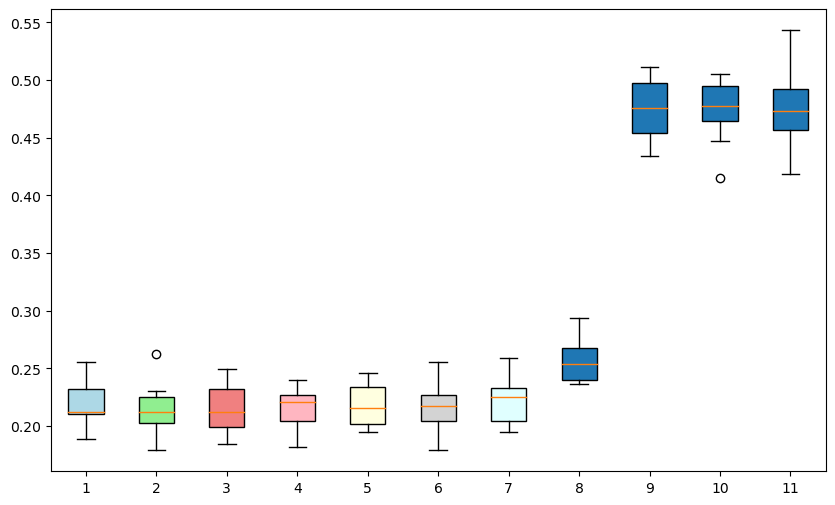

In [62]:
k = 10
dist_lasso = []

# Generaremos dos gráficos, uno por método. En cada gráfico, se muestra la distribución del error de predicción (definido como MSE) según el hiperparámetro lambda.
for config in configuraciones_lasso:
    modelo = LogisticRegression(max_iter=500, **config)
    resultados = cross_validation(modelo, k, X, y)
    ecm_part = resultados[['Particion', 'MSE']]
    dist_lasso.append(ecm_part)

# Crear un gráfico con 10 boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Lista de etiquetas para los boxplots
#labels = [f'DataFrame {i + 1}' for i in range(10)]

# Recopilar todas las distribuciones de MSE
mse_data = [ecm_part['MSE'].values for ecm_part in dist_lasso]

# Crear los boxplots y agregarlos al gráfico
boxplots = ax.boxplot(mse_data, patch_artist=True)

# Personalizar los colores de los boxplots
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow', 'lightgray', 'lightcyan', 'lightmagenta', 'lightsalmon', 'lightseagreen']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Configurar el gráfico
ax.set(title='Distribuciones de MSE, según el parámetro lambda', xlabel='Lambdas', ylabel='MSE')



C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

ValueError: Invalid RGBA argument: 'lightmagenta'

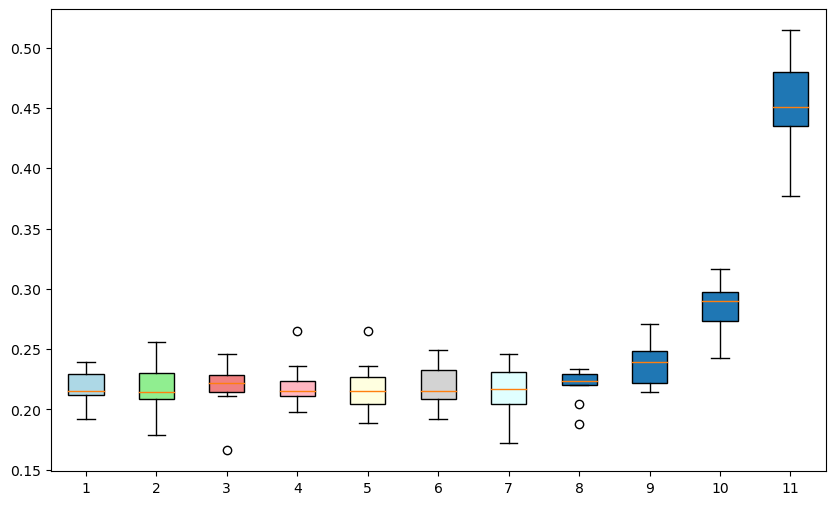

In [63]:
k = 10
dist_ridge = []

# Generaremos dos gráficos, uno por método. En cada gráfico, se muestra la distribución del error de predicción (definido como MSE) según el hiperparámetro lambda.
for config in configuraciones_ridge:
    modelo = LogisticRegression(max_iter=500, **config)
    resultados = cross_validation(modelo, k, X, y)
    ecm_part = resultados[['Particion', 'MSE']]
    dist_ridge.append(ecm_part)

# Crear un gráfico con 10 boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Lista de etiquetas para los boxplots
#labels = [f'DataFrame {i + 1}' for i in range(10)]

# Recopilar todas las distribuciones de MSE
mse_data = [ecm_part['MSE'].values for ecm_part in dist_ridge]

# Crear los boxplots y agregarlos al gráfico
boxplots = ax.boxplot(mse_data, patch_artist=True)

# Personalizar los colores de los boxplots
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow', 'lightgray', 'lightcyan', 'lightmagenta', 'lightsalmon', 'lightseagreen']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Configurar el gráfico
ax.set(title='Distribuciones de MSE, según el parámetro lambda', xlabel='Lambdas', ylabel='MSE')

C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

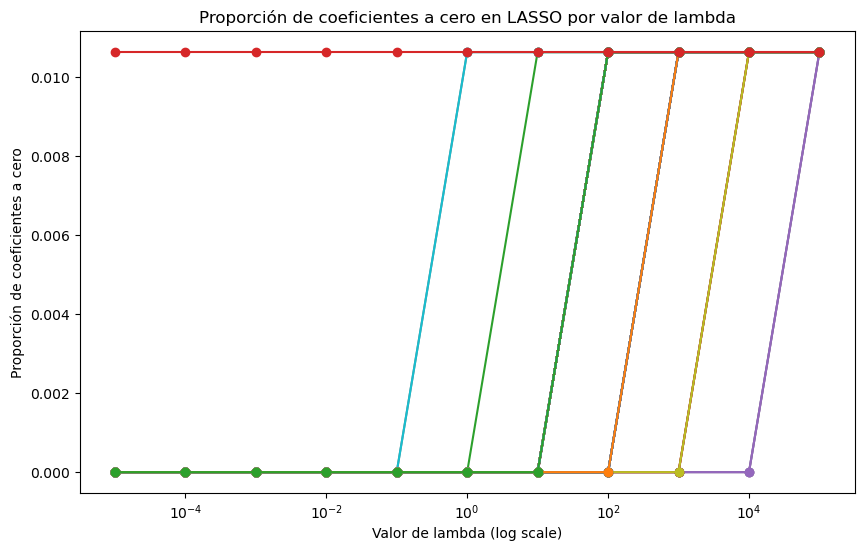

In [64]:
proporciones_lasso = []

# Calcular la proporción de coeficientes a cero para cada valor de lambda en LASSO
for config in configuraciones_lasso:
    modelo = LogisticRegression(max_iter=500, **config)
    modelo.fit(X, y)  # Ajustar el modelo con todo el conjunto de datos para obtener los coeficientes
    coef_cero = sum(modelo.coef_ == 0)  # Contar coeficientes iguales a cero
    total_coef = modelo.coef_.size  # Contar total de coeficientes
    prop_coef_cero = coef_cero / total_coef  # Calcular proporción
    proporciones_lasso.append(prop_coef_cero)

# Crear un nuevo gráfico para mostrar la proporción de coeficientes a cero por valor de lambda en LASSO
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(lambda_values, proporciones_lasso, marker='o', linestyle='-')

# Configurar el gráfico
ax.set(title='Proporción de coeficientes a cero en LASSO por valor de lambda', xlabel='Valor de lambda (log scale)', ylabel='Proporción de coeficientes a cero')
ax.set_xscale('log')  # Utilizar escala logarítmica en el eje x

# Mostrar el gráfico
plt.show()


## Ejercicio 6

In [ ]:
## Respondemos esto en el reporte

## Ejercicio 7

In [ ]:
## No se si hacer full texto o si correr algo aqui

## Ejercicio 8

In [ ]:
## No se si hacer full texto o si correr algo aqui

## Ejercicio 9

In [ ]:
#Con el metodo que seleccionaron, predigan qu´e personas son pobres dentro de la base norespondieron. ¿Qu´e proporci´on de los hogares son pobres en esa
#submuestra?